<a href="https://colab.research.google.com/github/Swayamprakashpatel/IR_Tablet/blob/main/IR_Tablet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR, SVC
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Assuming you have the dataset in a CSV file named 'data.csv'
df = pd.read_csv('/content/Data.csv')
df = df.drop(['Batch No.',], axis = 1)


In [14]:
print(y1)

0      0.33
1      0.41
2      0.31
3      0.59
4      0.56
       ... 
859    0.51
860    0.22
861    0.02
862    0.07
863    0.44
Name: Unnamed: 15, Length: 864, dtype: float64


In [15]:


# Splitting the dataset into features (X) and targets (y)
X = df.iloc[:, 0:9]  # Adjust the column indices as per your dataset
X1 = X.iloc[:, 0:2] # Binder Type and Disintegrant type
X2 = X.iloc[:, 2:4].apply(pd.to_numeric, errors='coerce') / 10 # Disintegrant and binder amount
X3 = X.iloc[:, 4:6].apply(pd.to_numeric, errors='coerce') / 100 # Mannitola and MCC amount
X4 = X.iloc[:, 6:7].apply(pd.to_numeric, errors='coerce') / 20 # Punch Size
X5 = X.iloc[:, 7:8].apply(pd.to_numeric, errors='coerce') / 10 # Compression Force
X6 = X.iloc[:,8:9].apply(pd.to_numeric, errors='coerce') / 1000 # Tablet Weight

y1 = df.iloc[:, 9:10].apply(pd.to_numeric, errors='coerce') / 20  # Output column 1 = Hardness(kg/cm2)
y2 = df.iloc[:, 10:11].apply(pd.to_numeric, errors='coerce') / 10  # Output column 2 = % Friability
y3 = df.iloc[:, 11:12].apply(pd.to_numeric, errors='coerce') / 1000  # Output column 3 = Disin. Time

# Perform one-hot encoding on X1
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
X1_encoded = onehot_encoder.fit_transform(X1)

# Create a DataFrame with the encoded columns
X1_encoded_df = pd.DataFrame(X1_encoded, columns=onehot_encoder.get_feature_names_out(X1.columns))

# Concatenate the encoded columns with the remaining columns in X
X_encoded = pd.concat([X1_encoded_df, X2,X3,X4,X5,X6], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test = train_test_split(X_encoded, y1, y2, y3, test_size=0.4, random_state=42)

# Linear Regression for y1
linear_reg_y1 = LinearRegression()
linear_reg_y1.fit(X_train, y1_train)
y1_pred_linear = linear_reg_y1.predict(X_test)
linear_mse_y1 = mean_squared_error(y1_test, y1_pred_linear)

# Linear Regression for y2
linear_reg_y2 = LinearRegression()
linear_reg_y2.fit(X_train, y2_train)
y2_pred_linear = linear_reg_y2.predict(X_test)
linear_mse_y2 = mean_squared_error(y2_test, y2_pred_linear)

# Linear Regression for y3
linear_reg_y3 = LinearRegression()
linear_reg_y3.fit(X_train, y3_train)
y3_pred_linear = linear_reg_y3.predict(X_test)
linear_mse_y3 = mean_squared_error(y3_test, y3_pred_linear)

# Support Vector Machine (SVM) for y1
svm_y1 = SVR()
svm_y1.fit(X_train, y1_train)
y1_pred_svm = svm_y1.predict(X_test)
svm_mse_y1 = mean_squared_error(y1_test, y1_pred_svm)

# Support Vector Machine (SVM) for y2
svm_y2 = SVR()
svm_y2.fit(X_train, y2_train)
y2_pred_svm = svm_y2.predict(X_test)
svm_mse_y2 = mean_squared_error(y2_test, y2_pred_svm)

# Support Vector Machine (SVM) for y3
svm_y3 = SVR()
svm_y3.fit(X_train, y3_train)
y3_pred_svm = svm_y3.predict(X_test)
svm_mse_y3 = mean_squared_error(y3_test, y3_pred_svm)

# k-Nearest Neighbors (k-NN) for y1
knn_y1 = KNeighborsRegressor()
knn_y1.fit(X_train, y1_train)
y1_pred_knn = knn_y1.predict(X_test)
knn_mse_y1 = mean_squared_error(y1_test, y1_pred_knn)

# k-Nearest Neighbors (k-NN) for y2
knn_y2 = KNeighborsRegressor()
knn_y2.fit(X_train, y2_train)
y2_pred_knn = knn_y2.predict(X_test)
knn_mse_y2 = mean_squared_error(y2_test, y2_pred_knn)

# k-Nearest Neighbors (k-NN) for y3
knn_y3 = KNeighborsRegressor()
knn_y3.fit(X_train, y3_train)
y3_pred_knn = knn_y3.predict(X_test)
knn_mse_y3 = mean_squared_error(y3_test, y3_pred_knn)

# Artificial Neural Network (ANN) for y1
from sklearn.metrics import r2_score

# Define custom R-squared metric
def r_squared(y_true, y_pred):
    return 1 - tf.reduce_sum(tf.square(y_true - y_pred)) / tf.reduce_sum(tf.square(y_true - tf.reduce_mean(y_true)))

# Define custom R-squared loss function
def r_squared_loss(y_true, y_pred):
    return -r_squared(y_true, y_pred)

# Define custom callback to monitor validation R-squared and save the best model
class R2Callback(tf.keras.callbacks.Callback):
    def __init__(self, X_val, y_val, filepath, patience=10, delta=0.01):
        super(R2Callback, self).__init__()
        self.X_val = X_val
        self.y_val = y_val
        self.filepath = filepath
        self.patience = patience
        self.delta = delta
        self.best_r2 = -float('inf')
        self.wait = 0

    def on_epoch_end(self, epoch, logs=None):
        y_pred_val = self.model.predict(self.X_val)
        r2_val = r2_score(self.y_val, y_pred_val)
        print(f'Validation R^2: {r2_val}')
        if r2_val - self.best_r2 > self.delta:
            self.best_r2 = r2_val
            self.wait = 0
            self.model.save(self.filepath, overwrite=True)
            print("Model saved with validation R^2:", r2_val)
        else:
            self.wait += 1
            if self.wait >= self.patience:
                self.stopped_epoch = epoch
                self.model.stop_training = True
                print("Early stopping due to no improvement in validation R^2.")

# Define file paths to save the best models for y1, y2, and y3
filepath_y1 = '/content/drive/My Drive/y1.hdf5'
filepath_y2 = '/content/drive/My Drive/y2.hdf5'
filepath_y3 = '/content/drive/My Drive/y3.hdf5'

# Define custom callback to monitor validation R-squared for y1, y2, and y3
r2_callback_y1 = R2Callback(X_test, y1_test, filepath_y1, patience=369, delta=0.01)
r2_callback_y2 = R2Callback(X_test, y2_test, filepath_y2, patience=369, delta=0.01)
r2_callback_y3 = R2Callback(X_test, y3_test, filepath_y3, patience=369, delta=0.01)

# Define and compile ANN model for y1
ann_y1 = tf.keras.Sequential([
    tf.keras.layers.Dense(369, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

ann_y1.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1),
                loss=r_squared_loss,
                metrics=[r_squared])

# Train the ANN model for y1 with the custom callback
hist_y1 = ann_y1.fit(X_train, y1_train, epochs=1000, callbacks=[r2_callback_y1], validation_data=(X_test, y1_test), batch_size=None)

# Load the best model for y1
ann_y1 = tf.keras.models.load_model(filepath_y1, custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})

# Predict using the best model for y1
y1_pred_ann = ann_y1.predict(X_test)

# Define and compile ANN model for y2
ann_y2 = tf.keras.Sequential([
    tf.keras.layers.Dense(369, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

ann_y2.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1),
                loss=r_squared_loss,
                metrics=[r_squared])

# Train the ANN model for y2 with the custom callback
hist_y2 = ann_y2.fit(X_train, y2_train, epochs=1000, callbacks=[r2_callback_y2], validation_data=(X_test, y2_test), batch_size=None)

# Load the best model for y2
ann_y2 = tf.keras.models.load_model(filepath_y2, custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})

# Predict using the best model for y2
y2_pred_ann = ann_y2.predict(X_test)

# Define and compile ANN model for y3
ann_y3 = tf.keras.Sequential([
    tf.keras.layers.Dense(369, activation='relu', input_shape=(13,)),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(369, activation='relu'),
    tf.keras.layers.Dense(1, activation='relu')
])

ann_y3.compile(optimizer=tf.keras.optimizers.Adadelta(learning_rate=0.1),
                loss=r_squared_loss,
                metrics=[r_squared])

# Train the ANN model for y3 with the custom callback
hist_y3 = ann_y3.fit(X_train, y3_train, epochs=1000, callbacks=[r2_callback_y3], validation_data=(X_test, y3_test), batch_size=None)

# Load the best model for y3
ann_y3 = tf.keras.models.load_model(filepath_y3, custom_objects={'r_squared': r_squared, 'r_squared_loss': r_squared_loss})

# Predict using the best model for y3
y3_pred_ann = ann_y3.predict(X_test)


from google.colab import files

# Replace 'file_path' with the path to the file you want to download
files.download('/content/drive/My Drive/y1.hdf5')
files.download('/content/drive/My Drive/y2.hdf5')
files.download('/content/drive/My Drive/y3.hdf5')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), f

Epoch 1/1000
11/11 [==============================] - 0s 11ms/step
Validation R^2: -0.14557547067464882
Model saved with validation R^2: -0.14557547067464882
17/17 [==============================] - 5s 160ms/step - loss: 0.7501 - r_squared: -0.7643 - val_loss: 0.2593 - val_r_squared: -0.2529
Epoch 2/1000
 4/17 [======>.......................] - ETA: 0s - loss: -0.2374 - r_squared: 0.2374

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.12898591891187472
Model saved with validation R^2: 0.12898591891187472
17/17 [==============================] - 1s 45ms/step - loss: -0.0413 - r_squared: 0.0726 - val_loss: -0.0832 - val_r_squared: 0.0860
Epoch 3/1000
11/17 [==================>...........] - ETA: 0s - loss: -0.3098 - r_squared: 0.3098

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: -0.2386832048089087
17/17 [==============================] - 0s 26ms/step - loss: -0.3438 - r_squared: 0.3116 - val_loss: 0.3552 - val_r_squared: -0.3469
Epoch 4/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.40689760370718564
Model saved with validation R^2: 0.40689760370718564
17/17 [==============================] - 0s 29ms/step - loss: 0.0280 - r_squared: -0.0345 - val_loss: -0.3855 - val_r_squared: 0.3886
Epoch 5/1000
10/17 [================>.............] - ETA: 0s - loss: -0.4841 - r_squared: 0.4841

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.06644250008078911
17/17 [==============================] - 0s 29ms/step - loss: -0.4418 - r_squared: 0.4457 - val_loss: 0.0129 - val_r_squared: -0.0045
Epoch 6/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -1.5902165450647567
17/17 [==============================] - 0s 26ms/step - loss: -0.4481 - r_squared: 0.3281 - val_loss: 1.7205 - val_r_squared: -1.7122
Epoch 7/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5086326918114141
Model saved with validation R^2: 0.5086326918114141
17/17 [==============================] - 0s 27ms/step - loss: -0.4305 - r_squared: 0.4440 - val_loss: -0.4699 - val_r_squared: 0.4750
Epoch 8/1000
12/17 [====================>.........] - ETA: 0s - loss: -0.4478 - r_squared: 0.4478

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.783288081459002
17/17 [==============================] - 0s 27ms/step - loss: -0.4356 - r_squared: 0.4109 - val_loss: 0.8657 - val_r_squared: -0.8604
Epoch 9/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -3.715759707386603
17/17 [==============================] - 0s 27ms/step - loss: -0.4184 - r_squared: 0.4193 - val_loss: 4.1781 - val_r_squared: -4.1627
Epoch 10/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: -1.308804496377474
17/17 [==============================] - 0s 27ms/step - loss: -0.3686 - r_squared: 0.3729 - val_loss: 1.4418 - val_r_squared: -1.4381
Epoch 11/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5412511736612291
Model saved with validation R^2: 0.5412511736612291
17/17 [==============================] - 0s 28ms/step - loss: -0.4735 - r_squared: 0.4824 - val_loss: -0.5118 - val_r_squared: 0.5161
Epoch 12/1000
11/17

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.27169232649486963
17/17 [==============================] - 0s 26ms/step - loss: -0.6521 - r_squared: 0.6372 - val_loss: -0.2131 - val_r_squared: 0.2201
Epoch 13/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.5315951739498553
17/17 [==============================] - 0s 26ms/step - loss: -0.5986 - r_squared: 0.5940 - val_loss: -0.4959 - val_r_squared: 0.4998
Epoch 14/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.528582525254881
17/17 [==============================] - 0s 26ms/step - loss: -0.6243 - r_squared: 0.6295 - val_loss: -0.5055 - val_r_squared: 0.5084
Epoch 15/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5811110496641233
Model saved with validation R^2: 0.5811110496641233
17/17 [==============================] - 1s 30ms/step - loss: -0.4668 - r_squared: 0.4746 - val_loss: -0.5511 - val_r_squared: 0.5552
Epoch 16/1000
11/1

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5666321729666935
17/17 [==============================] - 0s 27ms/step - loss: -0.6564 - r_squared: 0.6634 - val_loss: -0.5315 - val_r_squared: 0.5355
Epoch 17/1000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.5452467080209578
17/17 [==============================] - 0s 28ms/step - loss: -0.4772 - r_squared: 0.4752 - val_loss: -0.5223 - val_r_squared: 0.5254
Epoch 18/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.19846317588735185
17/17 [==============================] - 0s 27ms/step - loss: -0.5769 - r_squared: 0.5220 - val_loss: 0.3249 - val_r_squared: -0.3223
Epoch 19/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5393872456944357
17/17 [==============================] - 0s 25ms/step - loss: -0.6758 - r_squared: 0.6712 - val_loss: -0.5158 - val_r_squared: 0.5179
Epoch 20/1000
11/11 [==============================] - 0s 4ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.5893412416541775
17/17 [==============================] - 0s 26ms/step - loss: -0.7232 - r_squared: 0.6967 - val_loss: 0.7391 - val_r_squared: -0.7308
Epoch 24/1000
11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.31264131185356303
17/17 [==============================] - 1s 36ms/step - loss: -0.6356 - r_squared: 0.6382 - val_loss: -0.2787 - val_r_squared: 0.2800
Epoch 25/1000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.20126612238201158
17/17 [==============================] - 1s 36ms/step - loss: -0.6762 - r_squared: 0.6802 - val_loss: -0.1615 - val_r_squared: 0.1658
Epoch 26/1000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.5423253177493454
17/17 [==============================] - 1s 42ms/step - loss: -0.7436 - r_squared: 0.7396 - val_loss: -0.5074 - val_r_squared: 0.5119
Epoch 27/1000
11/11 [==============================] - 0s 7ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.4740633160252019
17/17 [==============================] - 1s 31ms/step - loss: -0.7455 - r_squared: 0.7407 - val_loss: -0.4256 - val_r_squared: 0.4295
Epoch 31/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6499156353095503
17/17 [==============================] - 0s 27ms/step - loss: -0.6022 - r_squared: 0.6173 - val_loss: -0.6200 - val_r_squared: 0.6218
Epoch 32/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.7114880133518637
17/17 [==============================] - 0s 24ms/step - loss: -0.7662 - r_squared: 0.7333 - val_loss: 0.7920 - val_r_squared: -0.7858
Epoch 33/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.714727651509329
Model saved with validation R^2: 0.714727651509329
17/17 [==============================] - 0s 29ms/step - loss: -0.6851 - r_squared: 0.6888 - val_loss: -0.6954 - val_r_squared: 0.6981
Epoch 34/1000
11/17

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6681590162245774
17/17 [==============================] - 0s 27ms/step - loss: -0.7841 - r_squared: 0.7862 - val_loss: -0.6484 - val_r_squared: 0.6516
Epoch 35/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6555825192754496
17/17 [==============================] - 0s 28ms/step - loss: -0.7290 - r_squared: 0.7369 - val_loss: -0.6238 - val_r_squared: 0.6264
Epoch 36/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.7168724157304938
17/17 [==============================] - 0s 28ms/step - loss: -0.7337 - r_squared: 0.7092 - val_loss: 0.9110 - val_r_squared: -0.9094
Epoch 37/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.47935736826916386
17/17 [==============================] - 0s 27ms/step - loss: -0.5078 - r_squared: 0.5256 - val_loss: -0.4489 - val_r_squared: 0.4504
Epoch 38/1000
11/11 [==============================] - 0s 4ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5325798961178391
17/17 [==============================] - 0s 26ms/step - loss: -0.6265 - r_squared: 0.6251 - val_loss: -0.5166 - val_r_squared: 0.5185
Epoch 46/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5872797274942037
17/17 [==============================] - 0s 28ms/step - loss: -0.8112 - r_squared: 0.8114 - val_loss: -0.5495 - val_r_squared: 0.5516
Epoch 47/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7057698658443816
17/17 [==============================] - 0s 27ms/step - loss: -0.6242 - r_squared: 0.6129 - val_loss: -0.6918 - val_r_squared: 0.6944
Epoch 48/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7233594639015185
17/17 [==============================] - 0s 26ms/step - loss: -0.7339 - r_squared: 0.7407 - val_loss: -0.7122 - val_r_squared: 0.7144
Epoch 49/1000
11/11 [==============================] - 0s 7ms/step
Val

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7684340558686494
Model saved with validation R^2: 0.7684340558686494
17/17 [==============================] - 0s 29ms/step - loss: -0.8883 - r_squared: 0.8906 - val_loss: -0.7529 - val_r_squared: 0.7546
Epoch 65/1000
11/17 [==================>...........] - ETA: 0s - loss: -0.7631 - r_squared: 0.7631

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7167251436541437
17/17 [==============================] - 0s 26ms/step - loss: -0.8132 - r_squared: 0.8195 - val_loss: -0.6884 - val_r_squared: 0.6904
Epoch 66/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.41037482327278696
17/17 [==============================] - 0s 27ms/step - loss: -0.7983 - r_squared: 0.7996 - val_loss: -0.3821 - val_r_squared: 0.3839
Epoch 67/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.9390300241469802
17/17 [==============================] - 0s 26ms/step - loss: -0.8161 - r_squared: 0.7594 - val_loss: 1.0448 - val_r_squared: -1.0401
Epoch 68/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7275453615423488
17/17 [==============================] - 0s 26ms/step - loss: -0.7862 - r_squared: 0.7918 - val_loss: -0.7083 - val_r_squared: 0.7108
Epoch 69/1000
11/11 [==============================] - 0s 4ms/step
V

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7753701666764872
17/17 [==============================] - 0s 26ms/step - loss: -0.9148 - r_squared: 0.9106 - val_loss: -0.7580 - val_r_squared: 0.7596
Epoch 80/1000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.5863262629112096
17/17 [==============================] - 1s 32ms/step - loss: -0.7516 - r_squared: 0.7481 - val_loss: -0.5471 - val_r_squared: 0.5470
Epoch 81/1000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.7425800925866399
17/17 [==============================] - 1s 38ms/step - loss: -0.6979 - r_squared: 0.7074 - val_loss: -0.7276 - val_r_squared: 0.7292
Epoch 82/1000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.736035751043489
17/17 [==============================] - 1s 42ms/step - loss: -0.8638 - r_squared: 0.8660 - val_loss: -0.7206 - val_r_squared: 0.7226
Epoch 83/1000
11/11 [==============================] - 0s 6ms/step
Vali

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.37183203672697607
17/17 [==============================] - 0s 27ms/step - loss: -0.7801 - r_squared: 0.7565 - val_loss: -0.3095 - val_r_squared: 0.3114
Epoch 100/1000
11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.7687237632652496
17/17 [==============================] - 0s 26ms/step - loss: -0.8963 - r_squared: 0.8990 - val_loss: -0.7488 - val_r_squared: 0.7501
Epoch 101/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.6197881735962112
17/17 [==============================] - 0s 27ms/step - loss: -0.9187 - r_squared: 0.8800 - val_loss: -0.5968 - val_r_squared: 0.5987
Epoch 102/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7386683181297449
17/17 [==============================] - 0s 26ms/step - loss: -0.8977 - r_squared: 0.9012 - val_loss: -0.7225 - val_r_squared: 0.7241
Epoch 103/1000
11/11 [==============================] - 0s 4ms/ste

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.6930437448676547
17/17 [==============================] - 1s 32ms/step - loss: -0.7772 - r_squared: 0.7668 - val_loss: -0.6772 - val_r_squared: 0.6777
Epoch 123/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5517741436423911
17/17 [==============================] - 0s 25ms/step - loss: -0.9287 - r_squared: 0.9258 - val_loss: -0.5050 - val_r_squared: 0.5056
Epoch 124/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7845986461319484
17/17 [==============================] - 0s 27ms/step - loss: -0.9074 - r_squared: 0.9041 - val_loss: -0.7646 - val_r_squared: 0.7655
Epoch 125/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7294410031537151
17/17 [==============================] - 0s 26ms/step - loss: -0.9184 - r_squared: 0.9181 - val_loss: -0.7079 - val_r_squared: 0.7091
Epoch 126/1000
11/11 [==============================] - 0s 4ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8109932284209134
17/17 [==============================] - 0s 26ms/step - loss: -0.9676 - r_squared: 0.9672 - val_loss: -0.8010 - val_r_squared: 0.8017
Epoch 157/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.5367118015293255
17/17 [==============================] - 0s 27ms/step - loss: -0.8822 - r_squared: 0.8745 - val_loss: -0.5162 - val_r_squared: 0.5182
Epoch 158/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.785031248532405
17/17 [==============================] - 0s 26ms/step - loss: -0.8666 - r_squared: 0.8702 - val_loss: -0.7657 - val_r_squared: 0.7661
Epoch 159/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8146444798468467
17/17 [==============================] - 0s 26ms/step - loss: -0.9579 - r_squared: 0.9580 - val_loss: -0.8005 - val_r_squared: 0.8015
Epoch 160/1000
11/11 [==============================] - 0s 4ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 5ms/step
Validation R^2: 0.8225934568318645
17/17 [==============================] - 0s 27ms/step - loss: -0.9209 - r_squared: 0.9218 - val_loss: -0.8062 - val_r_squared: 0.8070
Epoch 208/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.7252706364399444
17/17 [==============================] - 0s 26ms/step - loss: -0.9213 - r_squared: 0.9118 - val_loss: -0.6981 - val_r_squared: 0.6988
Epoch 209/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8359512014831345
17/17 [==============================] - 0s 24ms/step - loss: -0.9165 - r_squared: 0.9203 - val_loss: -0.8224 - val_r_squared: 0.8232
Epoch 210/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8223291864709543
17/17 [==============================] - 0s 20ms/step - loss: -0.8770 - r_squared: 0.8804 - val_loss: -0.8080 - val_r_squared: 0.8087
Epoch 211/1000
11/11 [==============================] - 0s 3ms/step

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.6354069827861861
17/17 [==============================] - 1s 42ms/step - loss: -0.9778 - r_squared: 0.9741 - val_loss: -0.6029 - val_r_squared: 0.6041
Epoch 251/1000
11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.8225414663694832
17/17 [==============================] - 1s 42ms/step - loss: -0.9696 - r_squared: 0.9708 - val_loss: -0.8044 - val_r_squared: 0.8047
Epoch 252/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -0.3224437897553196
17/17 [==============================] - 1s 34ms/step - loss: -0.6973 - r_squared: -0.2504 - val_loss: 0.4363 - val_r_squared: -0.4316
Epoch 253/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.7754989669246497
17/17 [==============================] - 0s 25ms/step - loss: -0.7140 - r_squared: 0.7264 - val_loss: -0.7566 - val_r_squared: 0.7575
Epoch 254/1000
11/11 [==============================] - 0s 3ms/st

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.851042928593109
17/17 [==============================] - 0s 26ms/step - loss: -0.9945 - r_squared: 0.9946 - val_loss: -0.8389 - val_r_squared: 0.8400
Epoch 400/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8476918301919996
17/17 [==============================] - 0s 24ms/step - loss: -0.9961 - r_squared: 0.9960 - val_loss: -0.8322 - val_r_squared: 0.8329
Epoch 401/1000
11/11 [==============================] - 0s 3ms/step
Validation R^2: 0.8097771524760561
17/17 [==============================] - 0s 24ms/step - loss: -0.9620 - r_squared: 0.9621 - val_loss: -0.7964 - val_r_squared: 0.7981
Epoch 402/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: 0.8415554936885582
17/17 [==============================] - 0s 28ms/step - loss: -0.9771 - r_squared: 0.9778 - val_loss: -0.8274 - val_r_squared: 0.8288
Epoch 403/1000
11/11 [==============================] - 0s 3ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 4ms/step
Validation R^2: -1.20028345990363
17/17 [==============================] - 0s 29ms/step - loss: 1.5574 - r_squared: -1.8673 - val_loss: 1.4574 - val_r_squared: -1.4660
Epoch 3/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -1.20028345990363
17/17 [==============================] - 0s 27ms/step - loss: 1.3163 - r_squared: -1.4401 - val_loss: 1.4574 - val_r_squared: -1.4660
Epoch 4/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -1.20028345990363
17/17 [==============================] - 0s 26ms/step - loss: 1.4283 - r_squared: -1.4056 - val_loss: 1.4574 - val_r_squared: -1.4660
Epoch 5/1000
11/11 [==============================] - 0s 4ms/step
Validation R^2: -1.20028345990363
17/17 [==============================] - 0s 26ms/step - loss: 1.4317 - r_squared: -1.4570 - val_loss: 1.4574 - val_r_squared: -1.4660
Epoch 6/1000
11/11 [==============================] - 0s 5ms/step
Validation 

Exception ignored in: <function _xla_gc_callback at 0x7dcbbaa35900>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


11/11 [==============================] - 0s 3ms/step
Epoch 1/1000
11/11 [==============================] - 0s 6ms/step
Validation R^2: 0.5271656636289108
Model saved with validation R^2: 0.5271656636289108
17/17 [==============================] - 2s 56ms/step - loss: 0.4696 - r_squared: -0.4297 - val_loss: -0.5080 - val_r_squared: 0.5081
Epoch 2/1000
11/17 [==================>...........] - ETA: 0s - loss: -0.6230 - r_squared: 0.6230

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 8ms/step
Validation R^2: 0.7292325293873974
Model saved with validation R^2: 0.7292325293873974
17/17 [==============================] - 1s 41ms/step - loss: -0.6247 - r_squared: 0.6275 - val_loss: -0.7223 - val_r_squared: 0.7220
Epoch 3/1000
 9/17 [==============>...............] - ETA: 0s - loss: -0.7030 - r_squared: 0.7030

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 7ms/step
Validation R^2: 0.7783684337289258
Model saved with validation R^2: 0.7783684337289258
17/17 [==============================] - 1s 46ms/step - loss: -0.7136 - r_squared: 0.7194 - val_loss: -0.7726 - val_r_squared: 0.7715
Epoch 4/1000
 4/17 [======>.......................] - ETA: 0s - loss: -0.7709 - r_squared: 0.7709

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 9ms/step
Validation R^2: 0.788174387435631
17/17 [==============================] - 1s 50ms/step - loss: -0.7614 - r_squared: 0.7675 - val_loss: -0.7831 - val_r_squared: 0.7823
Epoch 5/1000
11/11 [==============================] - 0s 8ms/step
Validation R^2: 0.8131517917567668
Model saved with validation R^2: 0.8131517917567668
17/17 [==============================] - 1s 43ms/step - loss: -0.7590 - r_squared: 0.7653 - val_loss: -0.8071 - val_r_squared: 0.8058
Epoch 6/1000
 1/17 [>.............................] - ETA: 0s - loss: -0.8242 - r_squared: 0.8242

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


11/11 [==============================] - 0s 10ms/step
Validation R^2: 0.8006861424486043
17/17 [==============================] - 1s 75ms/step - loss: -0.7911 - r_squared: 0.7881 - val_loss: -0.7875 - val_r_squared: 0.7862
Epoch 7/1000
 6/17 [=========>....................] - ETA: 0s - loss: -0.8136 - r_squared: 0.8136

KeyboardInterrupt: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate Linear Regression model for y1
linear_mse_y1 = mean_squared_error(y1_test, y1_pred_linear)
print("Linear Regression MSE for y1:", linear_mse_y1)

# Evaluate Linear Regression model for y2
linear_mse_y2 = mean_squared_error(y2_test, y2_pred_linear)
print("Linear Regression MSE for y2:", linear_mse_y2)

# Evaluate Linear Regression model for y3
linear_mse_y3 = mean_squared_error(y3_test, y3_pred_linear)
print("Linear Regression MSE for y3:", linear_mse_y3)

# Evaluate Support Vector Machine (SVM) model for y1
svm_mse_y1 = mean_squared_error(y1_test, y1_pred_svm)
print("SVM MSE for y1:", svm_mse_y1)

# Evaluate Support Vector Machine (SVM) model for y2
svm_mse_y2 = mean_squared_error(y2_test, y2_pred_svm)
print("SVM MSE for y2:", svm_mse_y2)

# Evaluate Support Vector Machine (SVM) model for y3
svm_mse_y3 = mean_squared_error(y3_test, y3_pred_svm)
print("SVM MSE for y3:", svm_mse_y3)

# Evaluate k-Nearest Neighbors (k-NN) model for y1
knn_mse_y1 = mean_squared_error(y1_test, y1_pred_knn)
print("k-NN MSE for y1:", knn_mse_y1)

# Evaluate k-Nearest Neighbors (k-NN) model for y2
knn_mse_y2 = mean_squared_error(y2_test, y2_pred_knn)
print("k-NN MSE for y2:", knn_mse_y2)

# Evaluate k-Nearest Neighbors (k-NN) model for y3
knn_mse_y3 = mean_squared_error(y3_test, y3_pred_knn)
print("k-NN MSE for y3:", knn_mse_y3)

# Evaluate Artificial Neural Network (ANN) model for y1
ann_mse_y1 = mean_squared_error(y1_test, y1_pred_ann)
print("ANN MSE for y1:", ann_mse_y1)

# Evaluate Artificial Neural Network (ANN) model for y2
ann_mse_y2 = mean_squared_error(y2_test, y2_pred_ann)
print("ANN MSE for y2:", ann_mse_y2)

# Evaluate Artificial Neural Network (ANN) model for y3
ann_mse_y3 = mean_squared_error(y3_test, y3_pred_ann)
print("ANN MSE for y3:", ann_mse_y3)

# Create a bar plot of MSE values for each model
models = ['Linear Regression', 'SVM', 'k-NN', 'ANN']
mse_values_y1 = [linear_mse_y1, svm_mse_y1, knn_mse_y1, ann_mse_y1]
mse_values_y2 = [linear_mse_y2, svm_mse_y2, knn_mse_y2, ann_mse_y2]
mse_values_y3 = [linear_mse_y3, svm_mse_y3, knn_mse_y3, ann_mse_y3]

# Set width of bar
bar_width = 0.2

# Set position of bar on X axis
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Create grouped bar plot for MSE values for each model for y1, y2, and y3
plt.figure(figsize=(10, 6))
plt.bar(r1, mse_values_y1, color='b', width=bar_width, edgecolor='grey', label='y1')
plt.bar(r2, mse_values_y2, color='g', width=bar_width, edgecolor='grey', label='y2')
plt.bar(r3, mse_values_y3, color='orange', width=bar_width, edgecolor='grey', label='y3')

# Add xticks on the middle of the group bars
plt.xlabel('Models', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(models))], models)

# Add ylabel
plt.ylabel('MSE', fontweight='bold')

# Add title
plt.title('MSE Comparison for Different Models')
plt.legend()
plt.show()


#plt.figure(figsize=(10, 6))
#plt.bar(models, mse_values_y1, label='y1')
#plt.bar(models, mse_values_y2, label='y2')
#plt.bar(models, mse_values_y3, label='y3')
#plt.xlabel('Models')
#plt.ylabel('MSE')
#plt.title('MSE Comparison for Different Models')
#plt.legend()
#plt.show()

# Create a scatter plot to compare predicted and actual values for y1
plt.figure(figsize=(8, 6))
plt.scatter(y1_test, y1_pred_linear, label='Linear Regression')
plt.scatter(y1_test, y1_pred_svm, label='SVM')
plt.scatter(y1_test, y1_pred_knn, label='k-NN')
plt.scatter(y1_test, y1_pred_ann, label='ANN')
plt.xlabel('Actual y1')
plt.ylabel('Predicted y1')
plt.title('Comparison of Actual and Predicted y1')
plt.legend()
plt.show()

# Create a histogram of residuals for y1
residuals_y1 = y1_test - y1_pred_linear
plt.figure(figsize=(8, 6))
sns.histplot(residuals_y1, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals for y1 (Linear Regression)')
plt.show()

# Create a scatter plot to compare predicted and actual values for y2
plt.figure(figsize=(8, 6))
plt.scatter(y2_test, y2_pred_linear, label='Linear Regression')
plt.scatter(y2_test, y2_pred_svm, label='SVM')
plt.scatter(y2_test, y2_pred_knn, label='k-NN')
plt.scatter(y2_test, y2_pred_ann, label='ANN')
plt.xlabel('Actual y2')
plt.ylabel('Predicted y2')
plt.title('Comparison of Actual and Predicted y2')
plt.legend()
plt.show()

# Create a histogram of residuals for y2
residuals_y2 = y2_test - y2_pred_linear
plt.figure(figsize=(8, 6))
sns.histplot(residuals_y2, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals for y2 (Linear Regression)')
plt.show()

# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y3_test, y3_pred_linear, label='Linear Regression')
plt.scatter(y3_test, y3_pred_svm, label='SVM')
plt.scatter(y3_test, y3_pred_knn, label='k-NN')
plt.scatter(y3_test, y3_pred_ann, label='ANN')
plt.xlabel('Actual y3')
plt.ylabel('Predicted y3')
plt.title('Comparison of Actual and Predicted y3')
plt.legend()
plt.show()

# Create a histogram of residuals for y3
residuals_y3 = y3_test - y3_pred_linear
plt.figure(figsize=(8, 6))
sns.histplot(residuals_y3, kde=True)
plt.xlabel('Residuals')
plt.ylabel('Count')
plt.title('Histogram of Residuals for y3 (Linear Regression)')
plt.show()



In [ ]:
y1_pred_ann_all = ann_y1.predict(X_encoded)
# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y1, y1_pred_ann_all, label='ANN')
plt.xlabel('Actual y1')
plt.ylabel('Predicted y1')
plt.title('Comparison of Actual and Predicted y1')
plt.legend()
plt.show()


y2_pred_ann_all = ann_y2.predict(X_encoded)
# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y2, y2_pred_ann_all, label='ANN')
plt.xlabel('Actual y2')
plt.ylabel('Predicted y2')
plt.title('Comparison of Actual and Predicted y2')
plt.legend()
plt.show()

y3_pred_ann_all = ann_y3.predict(X_encoded)
# Create a scatter plot to compare predicted and actual values for y3
plt.figure(figsize=(8, 6))
plt.scatter(y3, y3_pred_ann_all, label='ANN')
plt.xlabel('Actual y3')
plt.ylabel('Predicted y3')
plt.title('Comparison of Actual and Predicted y3')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

r2_y1_ann_all = r2_score(y1, y1_pred_ann_all)
r2_y2_ann_all = r2_score(y2, y2_pred_ann_all)
r2_y3_ann_all = r2_score(y3, y3_pred_ann_all)
print('R_Square_y1 =', r2_y1_ann_all)
print('R_Square_y2 =', r2_y2_ann_all)
print('R_Square_y3 =', r2_y3_ann_all)

In [ ]:
# Calculate R-squared value for each model and output variable
r2_y1_linear = linear_reg_y1.score(X_test, y1_test)
r2_y2_linear = linear_reg_y2.score(X_test, y2_test)
r2_y3_linear = linear_reg_y3.score(X_test, y3_test)

r2_y1_svm = svm_y1.score(X_test, y1_test)
r2_y2_svm = svm_y2.score(X_test, y2_test)
r2_y3_svm = svm_y3.score(X_test, y3_test)

r2_y1_knn = knn_y1.score(X_test, y1_test)
r2_y2_knn = knn_y2.score(X_test, y2_test)
r2_y3_knn = knn_y3.score(X_test, y3_test)

r2_y1_ann = ann_y1.evaluate(X_test, y1_test)
r2_y1_ann = ann_y2.evaluate(X_test, y2_test)
r2_y3_ann = ann_y3.evaluate(X_test, y3_test)
# Predict using the trained ANN model
y1_pred_ann = ann_y1.predict(X_test)
y2_pred_ann = ann_y2.predict(X_test)
y3_pred_ann = ann_y3.predict(X_test)

# Calculate R-squared value for y1,y2 and y3
from sklearn.metrics import r2_score
r2_y1_ann = r2_score(y1_test, y1_pred_ann)
r2_y2_ann = r2_score(y2_test, y2_pred_ann)
r2_y3_ann = r2_score(y3_test, y3_pred_ann)


# Calculate residuals for each model and output variable
residuals_y1_linear = y1_test - y1_pred_linear
residuals_y2_linear = y2_test - y2_pred_linear
residuals_y3_linear = y3_test - y3_pred_linear

residuals_y1_svm = y1_test - y1_pred_svm
residuals_y2_svm = y2_test - y2_pred_svm
residuals_y3_svm = y3_test - y3_pred_svm

residuals_y1_knn = y1_test - y1_pred_knn
residuals_y2_knn = y2_test - y2_pred_knn
residuals_y3_knn = y3_test - y3_pred_knn


y1_test_1d = y1_test.ravel()
y1_pred_ann_1d = y1_pred_ann.ravel()
residuals_y1_ann = y1_test_1d - y1_pred_ann_1d

y2_test_1d = y2_test.ravel()
y2_pred_ann_1d = y2_pred_ann.ravel()
residuals_y2_ann = y2_test_1d - y2_pred_ann_1d

y3_test_1d = y3_test.ravel()
y3_pred_ann_1d = y3_pred_ann.ravel()
residuals_y3_ann = y3_test_1d - y3_pred_ann_1d

# Print the mean of residuals for y1
mean_residuals_y1_ann = np.mean(residuals_y1_ann)



# Store the evaluation metrics in a DataFrame
metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'SVM', 'k-NN', 'ANN'],
    'MSE y1': [linear_mse_y1, svm_mse_y1, knn_mse_y1, ann_mse_y1],
    'MSE y2': [linear_mse_y2, svm_mse_y2, knn_mse_y2, ann_mse_y2],
    'MSE y3': [linear_mse_y3, svm_mse_y3, knn_mse_y3, ann_mse_y3],
    'R^2 y1': [r2_y1_linear, r2_y1_svm, r2_y1_knn, r2_y1_ann],
    'R^2 y2': [r2_y2_linear, r2_y2_svm, r2_y2_knn, r2_y2_ann],
    'R^2 y3': [r2_y3_linear, r2_y3_svm, r2_y3_knn, r2_y3_ann],
    'Residuals y1': [np.mean(residuals_y1_linear), np.mean(residuals_y1_svm),
                     np.mean(residuals_y1_knn), np.mean(residuals_y1_ann)],
    'Residuals y2': [np.mean(residuals_y2_linear), np.mean(residuals_y2_svm),
                     np.mean(residuals_y2_knn), np.mean(residuals_y2_ann)],
    'Residuals y3': [np.mean(residuals_y3_linear), np.mean(residuals_y3_svm),
                     np.mean(residuals_y3_knn), np.mean(residuals_y3_ann)]
})

# Print the evaluation metrics
print("Evaluation Metrics:")
print(metrics)

#SEE RESULTS IN TABLE FORM

import numpy as np
import pandas as pd

# Calculate R-squared value for y1,y2 and y3
from sklearn.metrics import r2_score
r2_y1_ann = r2_score(y1_test, y1_pred_ann)
r2_y2_ann = r2_score(y2_test, y2_pred_ann)
r2_y3_ann = r2_score(y3_test, y3_pred_ann)

# Print the mean of residuals for y1
mean_residuals_y1_ann = np.mean(residuals_y1_ann)

# Create a DataFrame to store the evaluation metrics
metrics = pd.DataFrame({
    'Model': ['Linear Regression', 'SVM', 'k-NN', 'ANN'],
    'MSE y1': [linear_mse_y1, svm_mse_y1, knn_mse_y1, ann_mse_y1],
    'MSE y2': [linear_mse_y2, svm_mse_y2, knn_mse_y2, ann_mse_y2],
    'MSE y3': [linear_mse_y3, svm_mse_y3, knn_mse_y3, ann_mse_y3],
    'R^2 y1': [r2_y1_linear, r2_y1_svm, r2_y1_knn, r2_y1_ann],
    'R^2 y2': [r2_y2_linear, r2_y2_svm, r2_y2_knn, r2_y2_ann],
    'R^2 y3': [r2_y3_linear, r2_y3_svm, r2_y3_knn, r2_y3_ann],
    'Mean Residuals y1': [np.mean(residuals_y1_linear), np.mean(residuals_y1_svm),
                          np.mean(residuals_y1_knn), mean_residuals_y1_ann],
    'Mean Residuals y2': [np.mean(residuals_y2_linear), np.mean(residuals_y2_svm),
                          np.mean(residuals_y2_knn), np.mean(residuals_y2_ann)],
    'Mean Residuals y3': [np.mean(residuals_y3_linear), np.mean(residuals_y3_svm),
                          np.mean(residuals_y3_knn), np.mean(residuals_y3_ann)]
})

# Print the evaluation metrics
print("Evaluation Metrics:")
display(metrics)



11/11 [==============================] - 0s 2ms/step
Evaluation Metrics:
               Model    MSE y1    MSE y2    MSE y3    R^2 y1    R^2 y2  \
0  Linear Regression  0.000397  0.000067  0.001956  0.627093  0.461243   
1                SVM  0.001276  0.000656  0.003876 -0.197048 -4.292638   
2               k-NN  0.001060  0.000101  0.003164  0.004973  0.180670   
3                ANN  0.000148  0.000273  0.001181  0.860797 -1.200283   

     R^2 y3  Residuals y1  Residuals y2  Residuals y3  
0  0.784934     -0.000789      0.000741      0.004124  
1  0.573882     -0.014491     -0.023058     -0.025875  
2  0.652176     -0.002021      0.001005     -0.000271  
3  0.870168      0.000627      0.012192      0.002566  
Evaluation Metrics:


,Model,MSE y1,MSE y2,MSE y3,R^2 y1,R^2 y2,R^2 y3,Mean Residuals y1,Mean Residuals y2,Mean Residuals y3
0,Linear Regression,0.000397,0.000067,0.001956,0.627093,0.461243,0.784934,-0.000789,0.000741,0.004124
1,SVM,0.001276,0.000656,0.003876,-0.197048,-4.292638,0.573882,-0.014491,-0.023058,-0.025875
2,k-NN,0.001060,0.000101,0.003164,0.004973,0.180670,0.652176,-0.002021,0.001005,-0.000271
3,ANN,0.000148,0.000273,0.001181,0.860797,-1.200283,0.870168,0.000627,0.012192,0.002566


**FIND IMPORTANCE OF INDEPENDENT FACTORS**

In [ ]:
# Feature importances for y1
y1_feature_importances = np.abs(linear_reg_y1.coef_)
y1_feature_names = X_encoded.columns
y1_feature_importance_df = pd.DataFrame({'Feature': y1_feature_names, 'Importance': y1_feature_importances})
y1_feature_importance_df = y1_feature_importance_df.sort_values(by='Importance', ascending=False)

# Feature importances for y2
y2_feature_importances = np.abs(linear_reg_y2.coef_)
y2_feature_names = X_encoded.columns
y2_feature_importance_df = pd.DataFrame({'Feature': y2_feature_names, 'Importance': y2_feature_importances})
y2_feature_importance_df = y2_feature_importance_df.sort_values(by='Importance', ascending=False)

# Feature importances for y3
y3_feature_importances = np.abs(linear_reg_y3.coef_)
y3_feature_names = X_encoded.columns
y3_feature_importance_df = pd.DataFrame({'Feature': y3_feature_names, 'Importance': y3_feature_importances})
y3_feature_importance_df = y3_feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the feature importances for y1, y2, and y3
print("Feature Importances for y1:")
print(y1_feature_importance_df)
print("\nFeature Importances for y2:")
print(y2_feature_importance_df)
print("\nFeature Importances for y3:")
print(y3_feature_importance_df)


Feature Importances for y1:
                      Feature  Importance
11    Compressional Force(kN)    1.754829
10             Punch Size(mm)    1.335844
9                       A_MCC    0.355142
7            Binder Amount(%)    0.176444
12          Tablet Weight(mg)    0.081667
8                         A_M    0.044919
6      Disintegrant Amount(%)    0.018302
0           Binder Type_PS630    0.011707
5     Disintegration Type_SSG    0.010753
3      Disintegration Type_CP    0.010099
1             Binder Type_PVP    0.008576
2             Binder Type_SDL    0.001620
4   Disintegration Type_S1500    0.000345

Feature Importances for y2:
                      Feature  Importance
10             Punch Size(mm)    0.425536
11    Compressional Force(kN)    0.410421
7            Binder Amount(%)    0.340294
8                         A_M    0.267999
6      Disintegrant Amount(%)    0.251075
9                       A_MCC    0.243861
5     Disintegration Type_SSG    0.003485
3      Disintegrati

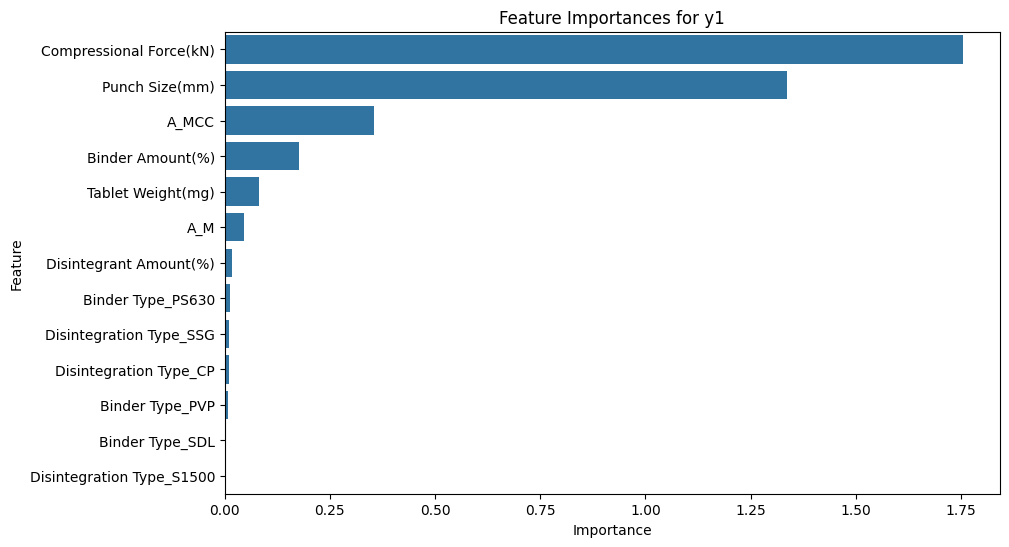

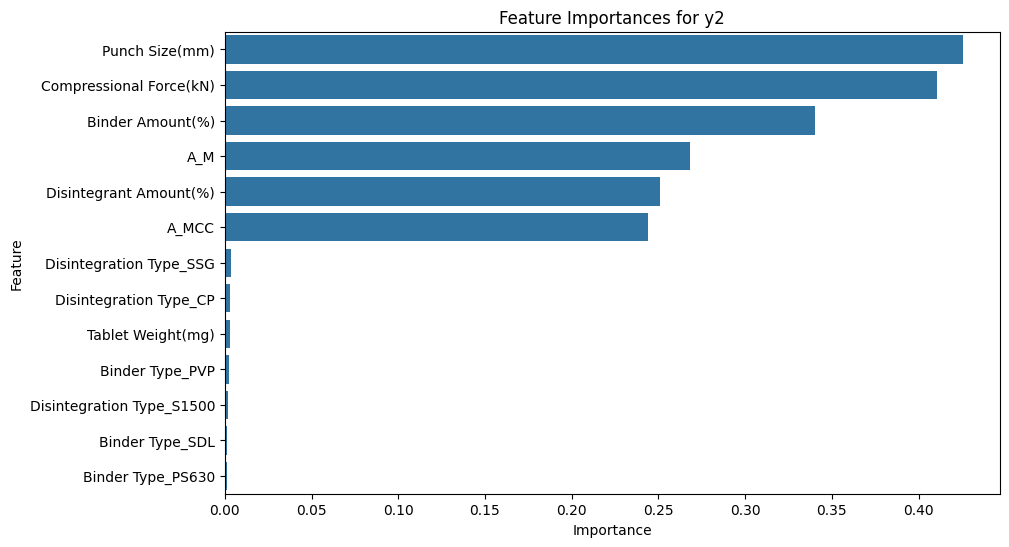

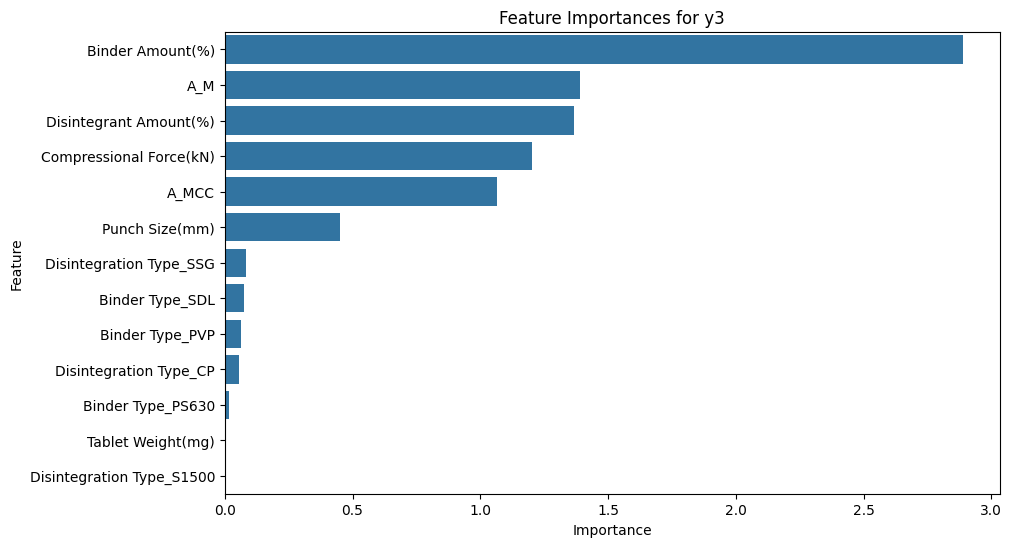

In [ ]:
# Import necessary libraries for visualization
import seaborn as sns

# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Plot the feature importances for y1
sns.barplot(x='Importance', y='Feature', data=y1_feature_importance_df)
plt.title('Feature Importances for y1')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Plot the feature importances for y2
sns.barplot(x='Importance', y='Feature', data=y2_feature_importance_df)
plt.title('Feature Importances for y2')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Set the figure size for better visibility
plt.figure(figsize=(10, 6))

# Plot the feature importances for y3
sns.barplot(x='Importance', y='Feature', data=y3_feature_importance_df)
plt.title('Feature Importances for y3')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Feature Importances for y1:


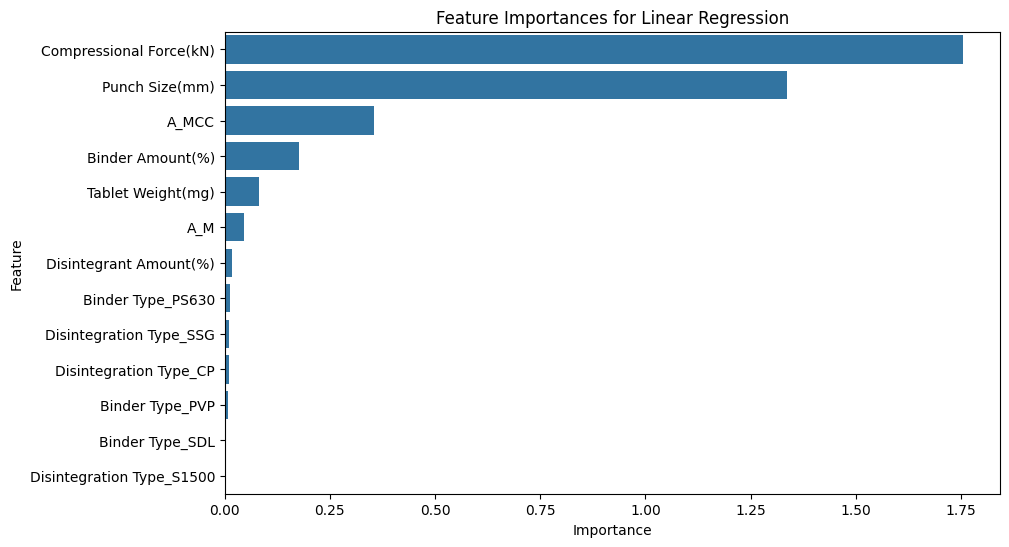

Feature importances are not available for Support Vector Machine.
Feature importances are not available for k-Nearest Neighbors.
Feature importances are not available for Artificial Neural Network.
Feature Importances for y2:


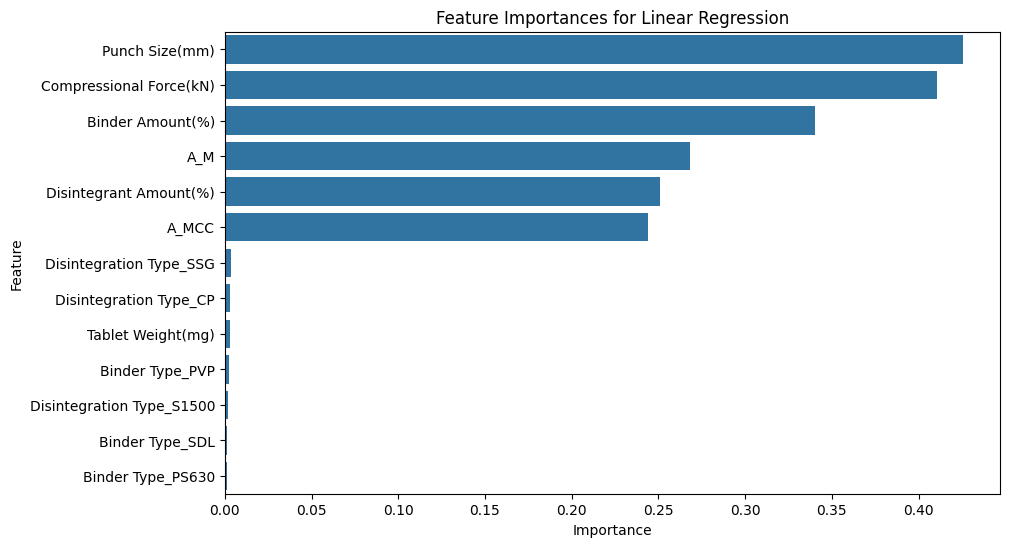

Feature importances are not available for Support Vector Machine.
Feature importances are not available for k-Nearest Neighbors.
Feature importances are not available for Artificial Neural Network.
Feature Importances for y3:


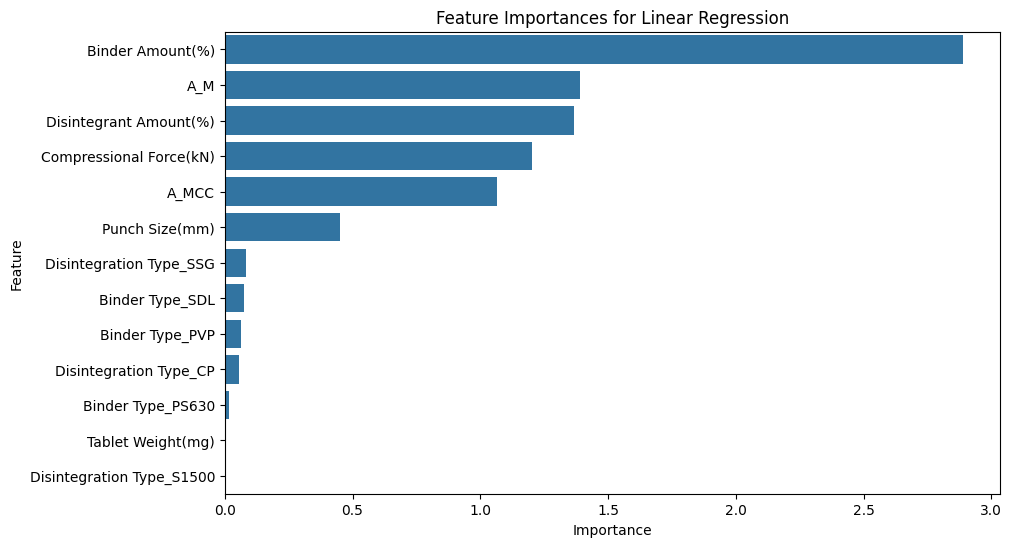

Feature importances are not available for Support Vector Machine.
Feature importances are not available for k-Nearest Neighbors.
Feature importances are not available for Artificial Neural Network.


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# ... (previous code to load and preprocess the data)

# Function to calculate and visualize feature importances
def calculate_and_visualize_feature_importances(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate feature importances for Linear Regression model
    if isinstance(model, LinearRegression):
        feature_importances = np.abs(model.coef_)
    # Calculate feature importances for SVM, k-NN, and ANN models
    else:
        feature_importances = None

    if feature_importances is not None:
        feature_names = X_train.columns
        feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

        # Visualization of feature importances
        plt.figure(figsize=(10, 6))
        sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
        plt.title(f'Feature Importances for {model_name}')
        plt.xlabel('Importance')
        plt.ylabel('Feature')
        plt.show()
    else:
        print(f"Feature importances are not available for {model_name}.")

# Models for y1, y2, and y3
models_y1 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

models_y2 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

models_y3 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

model_names = ['Linear Regression', 'Support Vector Machine', 'k-Nearest Neighbors', 'Artificial Neural Network']

# Loop through all models and visualize feature importances for y1
print("Feature Importances for y1:")
for model, model_name in zip(models_y1, model_names):
    calculate_and_visualize_feature_importances(model, model_name, X_train, X_test, y1_train, y1_test)

# Loop through all models and visualize feature importances for y2
print("Feature Importances for y2:")
for model, model_name in zip(models_y2, model_names):
    calculate_and_visualize_feature_importances(model, model_name, X_train, X_test, y2_train, y2_test)

# Loop through all models and visualize feature importances for y3
print("Feature Importances for y3:")
for model, model_name in zip(models_y3, model_names):
    calculate_and_visualize_feature_importances(model, model_name, X_train, X_test, y3_train, y3_test)


In [ ]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
import shap

# ... (previous code to load and preprocess the data)

# Function to calculate and visualize feature importances
def calculate_and_visualize_feature_importances(model, model_name, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)

    # Calculate feature importances for Linear Regression model
    if isinstance(model, LinearRegression):
        feature_importances = np.abs(model.coef_)
        feature_names = X_train.columns
    # Calculate feature importances for SVM and k-NN using permutation feature importance
    elif isinstance(model, (SVR, KNeighborsRegressor)):
        feature_importances = permutation_feature_importance(model, X_test, y_test, mean_squared_error)
        feature_names = X_train.columns
    # Calculate feature importances for ANN using SHAP values
    else:
        explainer = shap.DeepExplainer(model, X_train)
        shap_values = explainer.shap_values(X_test)
        feature_importances = np.abs(shap_values).mean(axis=0)
        feature_names = X_train.columns

    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Visualization of feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title(f'Feature Importances for {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

# Function to calculate permutation feature importance
def permutation_feature_importance(model, X, y, metric):
    baseline = metric(y, model.predict(X))
    imp = []
    for col in X.columns:
        save = X[col].copy()
        X[col] = np.random.permutation(X[col])
        m = metric(y, model.predict(X))
        X[col] = save
        imp.append(baseline - m)
    return np.array(imp)

# Splitting the dataset into features (X) and targets (y)
X = df.iloc[:, 0:9]  # Adjust the column indices as per your dataset
X1 = X.iloc[:, 0:2]
X2 = X.iloc[:, 2:8].apply(pd.to_numeric, errors='coerce') / 100
X3 = X.iloc[:,8:9].apply(pd.to_numeric, errors='coerce') / 1000

y1 = df.iloc[:, -3].apply(pd.to_numeric, errors='coerce') / 100  # Output column 1 = Hardness(kg/cm2)
y2 = df.iloc[:, -2].apply(pd.to_numeric, errors='coerce') / 100  # Output column 2 = % Friability
y3 = df.iloc[:, -1].apply(pd.to_numeric, errors='coerce') / 1000  # Output column 3 = Disin. Time

# Perform one-hot encoding on X1
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
X1_encoded = onehot_encoder.fit_transform(X1)

# Create a DataFrame with the encoded columns
X1_encoded_df = pd.DataFrame(X1_encoded, columns=onehot_encoder.get_feature_names_out(X1.columns))

# Concatenate the encoded columns with the remaining columns in X
X_encoded = pd.concat([X1_encoded_df, X2,X3], axis=1)

# Splitting the data into training and testing sets
X_train, X_test, y1_train, y1_test, y2_train, y2_test, y3_train, y3_test = train_test_split(X_encoded, y1, y2, y3, test_size=0.4, random_state=42)

# Models for y1, y2, and y3
models_y1 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

models_y2 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

models_y3 = [
    LinearRegression(),
    SVR(),
    KNeighborsRegressor(),
    MLPRegressor()
]

model_names = ['Linear Regression', 'Support Vector Machine', 'k-Nearest Neighbors', 'Artificial Neural Network']

# Loop through all models and visualize feature importances


ModuleNotFoundError: No module named 'shap'

In [ ]:
import shap

# Wrap the ANN model in a function to make it callable by SHAP
def ann_predict(input_data):
    return ann_y3.predict(input_data)

# Create an explainer object for the ANN model
explainer = shap.Explainer(ann_predict, X_train)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Summary plot for feature importances
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X_encoded.columns)

# Summary plot for individual feature impact on y3 output
shap.summary_plot(shap_values, X_test, feature_names=X_encoded.columns)


In [ ]:
from google.colab import files

# Replace 'file_path' with the path to the file you want to download
files.download('/content/drive/My Drive/y1.hdf5')
files.download('/content/drive/My Drive/y2.hdf5')
files.download('/content/drive/My Drive/y3.hdf5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>